In [5]:

! pip install matplotlib
! pip install pyttsx3
! pip install tabulate
! pip install requests

  Using cached pyttsx3-2.90-py3-none-any.whl.metadata (3.6 kB)
  Using cached comtypes-1.4.4-py3-none-any.whl.metadata (6.4 kB)
  Using cached pypiwin32-223-py3-none-any.whl.metadata (236 bytes)
Using cached pyttsx3-2.90-py3-none-any.whl (39 kB)
Using cached comtypes-1.4.4-py3-none-any.whl (210 kB)
Using cached pypiwin32-223-py3-none-any.whl (1.7 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [5]:
! pip install python-dotenv

+------------------------+--------+-------------+--------------+
| Top 5 Performing Coins | Symbol | Price (USD) | 24h % Change |
+------------------------+--------+-------------+--------------+
|       JasmyCoin        | JASMY  |    $0.03    |    11.31%    |
|       LayerZero        |  ZRO   |    $3.11    |    9.04%     |
|     Brett (Based)      | BRETT  |    $0.15    |    7.61%     |
|         Kaspa          |  KAS   |    $0.16    |    6.26%     |
|        Toncoin         |  TON   |    $7.62    |    6.05%     |
+------------------------+--------+-------------+--------------+
+---------------------------+--------+-------------+--------------+
| Bottom 5 Performing Coins | Symbol | Price (USD) | 24h % Change |
+---------------------------+--------+-------------+--------------+
|         Lido DAO          |  LDO   |    $2.18    |    -3.00%    |
|   Ethereum Name Service   |  ENS   |   $24.89    |    -3.77%    |
|      SingularityNET       |  AGIX  |    $0.62    |    -4.09%    |
|      

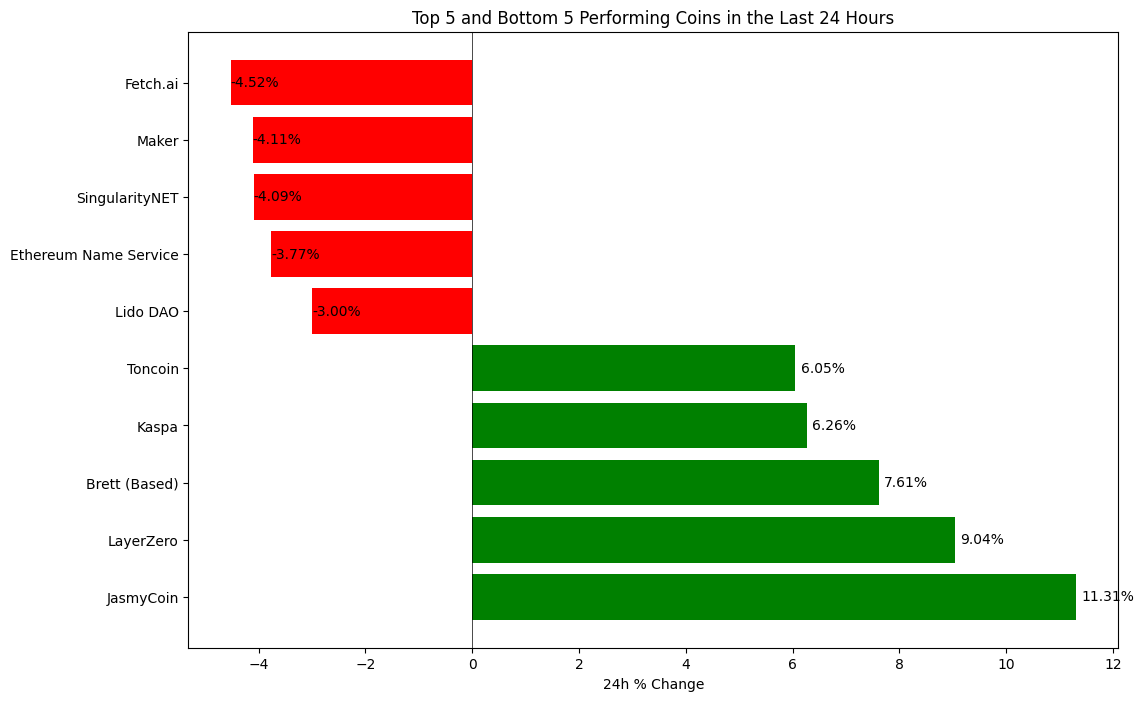

Listening for 'stop' command...
+------------------------+--------+-------------+--------------+
| Top 5 Performing Coins | Symbol | Price (USD) | 24h % Change |
+------------------------+--------+-------------+--------------+
|       JasmyCoin        | JASMY  |    $0.03    |    11.62%    |
|       LayerZero        |  ZRO   |    $3.11    |    8.80%     |
|     Brett (Based)      | BRETT  |    $0.15    |    7.83%     |
|         Kaspa          |  KAS   |    $0.16    |    6.41%     |
|        Toncoin         |  TON   |    $7.62    |    6.02%     |
+------------------------+--------+-------------+--------------+
+---------------------------+--------+-------------+--------------+
| Bottom 5 Performing Coins | Symbol | Price (USD) | 24h % Change |
+---------------------------+--------+-------------+--------------+
|         Lido DAO          |  LDO   |    $2.17    |    -3.07%    |
|      SingularityNET       |  AGIX  |    $0.62    |    -3.68%    |
|   Ethereum Name Service   |  ENS   |   $2

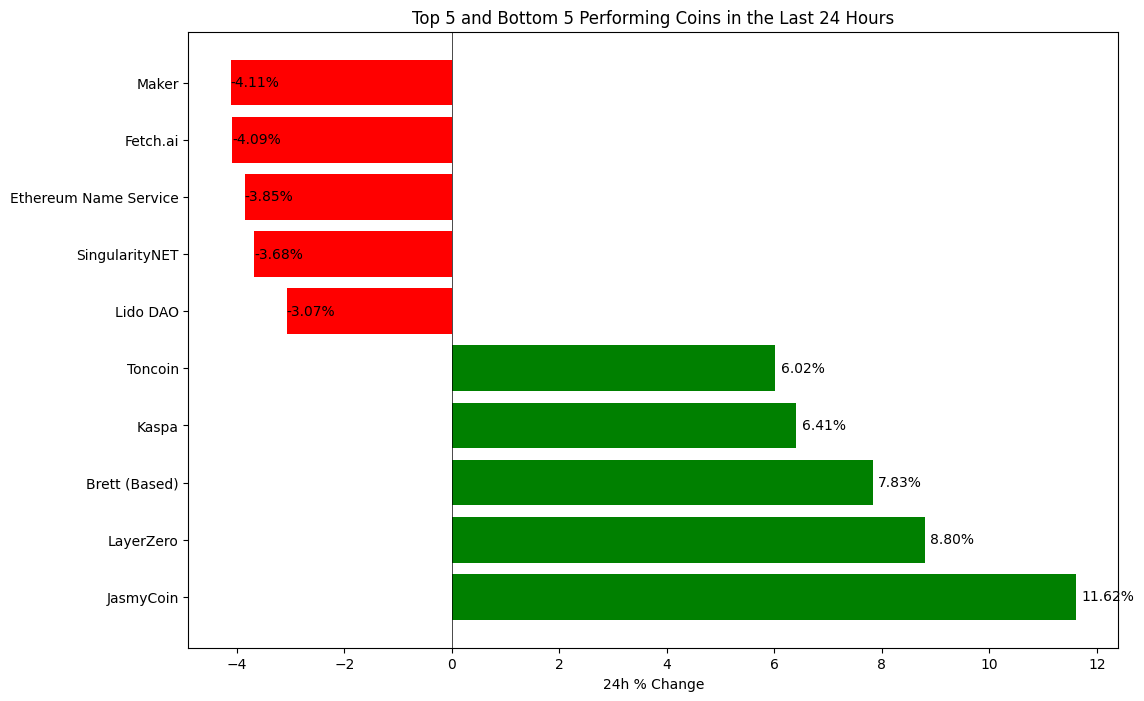

In [6]:
import requests
import pyttsx3
from tabulate import tabulate
import matplotlib.pyplot as plt
import time
import speech_recognition as sr
import os


# Hide password
import creds



# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Initialize the speech recognition
recognizer = sr.Recognizer()
microphone = sr.Microphone()

# Function to get the latest data from CoinMarketCap
def get_coin_data():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '100',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': f'{creds.api_key}'  # Replace with your API key
    }

    response = requests.get(url, headers=headers, params=parameters)
    data = response.json()
    return data['data']

# Function to find top and bottom performing coins
def find_top_bottom_performers(coin_data):
    # Sort coins by percent change in 24 hours
    sorted_coins = sorted(coin_data, key=lambda x: x['quote']['USD']['percent_change_24h'], reverse=True)

    top_5 = sorted_coins[:5]
    bottom_5 = sorted_coins[-5:]

    return top_5, bottom_5

# Function to format the coin data for speech
def format_for_speech(coin_list):
    formatted_list = []
    for coin in coin_list:
        formatted_list.append(f"{coin['name']} ({coin['symbol']}): ${coin['quote']['USD']['price']:.2f}, {coin['quote']['USD']['percent_change_24h']:.2f}% change")
    return formatted_list

# Function to create a table
def create_table(coin_list, title):
    table = [[coin['name'], coin['symbol'], f"${coin['quote']['USD']['price']:.2f}", f"{coin['quote']['USD']['percent_change_24h']:.2f}%"] for coin in coin_list]
    return tabulate(table, headers=[title, "Symbol", "Price (USD)", "24h % Change"], tablefmt="pretty")

# Function to visualize the coin data
def visualize_coins(top_5, bottom_5):
    # Prepare data for visualization
    coins = top_5 + bottom_5
    names = [coin['name'] for coin in coins]
    changes = [coin['quote']['USD']['percent_change_24h'] for coin in coins]
    
    plt.figure(figsize=(12, 8))
    bars = plt.barh(names, changes, color=['green' if x >= 0 else 'red' for x in changes])
    
    # Add labels and title
    plt.xlabel('24h % Change')
    plt.title('Top 5 and Bottom 5 Performing Coins in the Last 24 Hours')
    plt.axvline(x=0, color='black', linewidth=0.5)

    # Add data labels
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width if width < 0 else width + 0.1
        plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center')

    plt.show()

# Function to announce the top and bottom performers
def announce_performers():
    coin_data = get_coin_data()
    top_5, bottom_5 = find_top_bottom_performers(coin_data)

    top_5_table = create_table(top_5, "Top 5 Performing Coins")
    bottom_5_table = create_table(bottom_5, "Bottom 5 Performing Coins")

    print(top_5_table)
    print(bottom_5_table)

    visualize_coins(top_5, bottom_5)

    top_5_speech = "Top 5 performing coins in the last 24 hours are: " + ", ".join(format_for_speech(top_5))
    bottom_5_speech = "Bottom 5 performing coins in the last 24 hours are: " + ", ".join(format_for_speech(bottom_5))

    engine.say(top_5_speech)
    engine.say(bottom_5_speech)
    engine.runAndWait()

# Function to listen for stop command
def listen_for_stop():
    with microphone as source:
        print("Listening for 'stop' command...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)

    try:
        command = recognizer.recognize_google(audio)
        if command.lower() == "stop":
            return True
    except sr.UnknownValueError:
        pass  # Could not understand the audio
    except sr.RequestError:
        pass  # Could not request results from the service

    return False

if __name__ == '__main__':
    while True:
        announce_performers()
        if listen_for_stop():
            print("Stopping the script.")
            break
        time.sleep(60)  # Wait for 1 minute before updating again
